#### Identifying different types of passes

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

In [3]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]

    all_events = []
    for match_id in tqdm(match_ids):

        events = requests.get(url=match_url.format(match_id)).json()
        passes = [x for x in events if x['type']['name'] == "Pass"]
                
        for p in passes:
            attributes = {
                "x": p['location'][0],
                "y": p['location'][1],
                "end_x": p['pass']['end_location'][0],
                "end_y": p['pass']['end_location'][1],
                "outcome": 0 if 'outcome' in p['pass'].keys() else 1,
            }
            all_events.append(attributes)
            
    return pd.DataFrame(all_events)

In [4]:
competition_id = 43
season_id = 3
df = parse_data(competition_id, season_id)

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [01:14<00:00,  1.16s/it]


In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters=50)

In [7]:
features = df[['x','y','end_x','end_y']]

In [8]:
fit = model.fit(features)

In [9]:
df['cluster'] = model.predict(features)

In [10]:
df.head()

,x,y,end_x,end_y,outcome,cluster
0,61.0,41.0,37.0,37.0,1,41
1,38.0,42.0,97.0,57.0,0,45
2,24.0,24.0,48.0,33.0,0,11
3,73.0,48.0,68.0,48.0,1,40
4,75.0,50.0,82.0,53.0,0,40


In [12]:
for i,(x,y,end_x,end_y) in enumerate(fit.cluster_centers_):
    plt.arrow(x,y,end_x-x,end_y-y,
             head_width = 1,
             head_length = 1,
             color = 'red',
             alpha = 0.5,
             length_includes_head = True)
    plt.text((x+end_x)/2,(y+end_y)/2, str(i+1))

plt.xlim(0,120)
plt.ylim(0,80)
plt.legend()
plt.show()

No handles with labels found to put in legend.


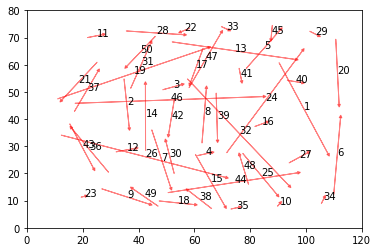

In [13]:
for i, (x, y, end_x, end_y) in enumerate(fit.cluster_centers_):
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=1,
              head_length=1,
              color='red',
              alpha=0.5,
              length_includes_head=True)
    
    plt.text((x+end_x)/2, (y+end_y)/2, str(i+1))
    
plt.xlim(0,120)
plt.ylim(0,80)
plt.show()